In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/Saily/OneDrive/Documents/assignment Ds1/Data Science Assignment/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


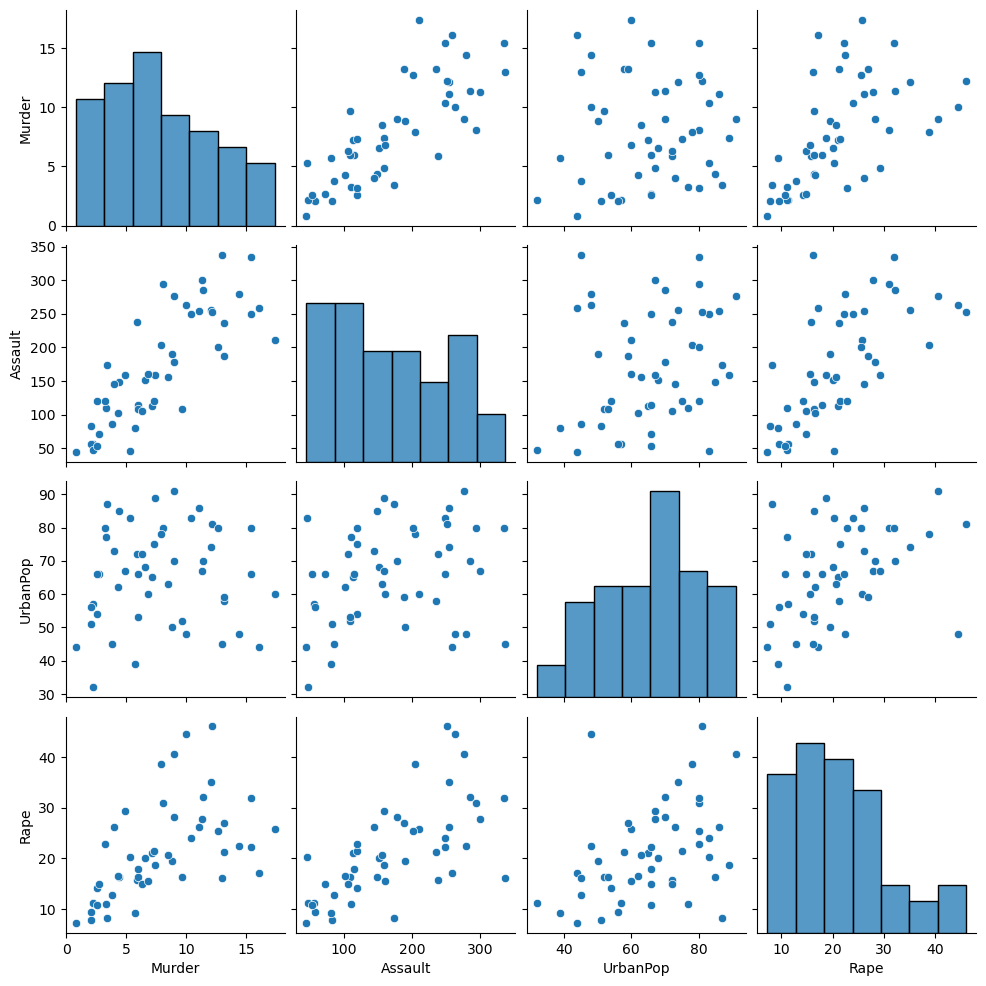

In [5]:
sns.pairplot(df)

In [6]:
x=df.drop(columns='Unnamed: 0',axis=1)


In [7]:
x.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [11]:
x=pd.DataFrame(x)

In [12]:
from scipy.cluster import hierarchy          #linkage dendogram

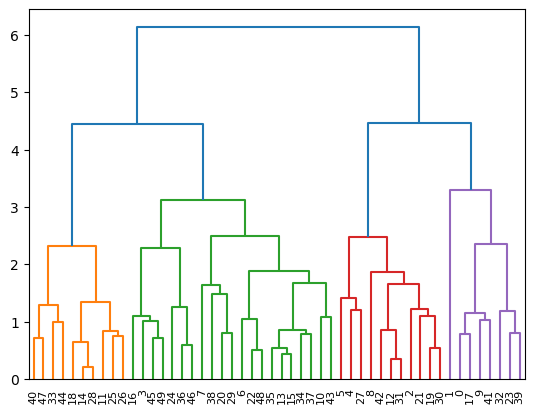

In [13]:
lk=hierarchy.linkage(x,method='complete')
dedo=hierarchy.dendrogram(lk)

In [14]:
from sklearn.cluster import AgglomerativeClustering

In [15]:
ag=AgglomerativeClustering(n_clusters=4)
y=ag.fit_predict(x)
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [16]:
df['cluster']=y
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [17]:
df.groupby(by='cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


<AxesSubplot:xlabel='Murder', ylabel='UrbanPop'>

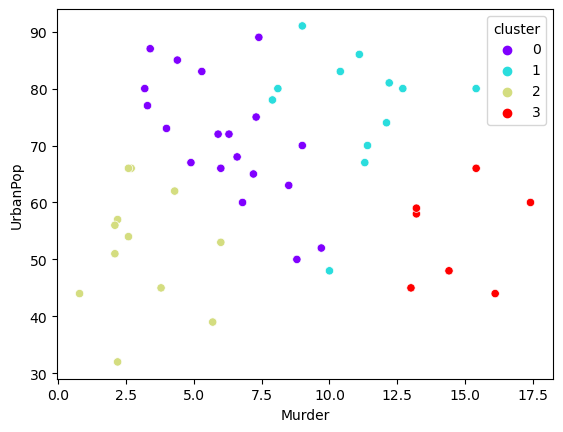

In [18]:
sns.scatterplot(df['Murder'],df['UrbanPop'],hue=df['cluster'],palette='rainbow')

In [19]:
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
ypred=lg.predict(xtest)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         4
           3       1.00      0.60      0.75         5

    accuracy                           0.77        13
   macro avg       0.75      0.59      0.65        13
weighted avg       1.00      0.77      0.86        13



In [26]:
#n_cluster =2  accuracy=0.92
#n_cluster =4  accuracy=0.77

#### k-Means


In [27]:
from sklearn.cluster import KMeans

In [28]:
km=KMeans()

In [29]:
y=km.fit_predict(x)
y

array([5, 4, 1, 2, 6, 6, 7, 2, 1, 5, 7, 0, 1, 2, 0, 2, 2, 5, 0, 1, 7, 1,
       0, 3, 2, 2, 2, 6, 0, 7, 1, 1, 3, 0, 2, 2, 2, 2, 7, 3, 0, 5, 1, 7,
       0, 2, 2, 0, 0, 2])

In [30]:
from sklearn.metrics import silhouette_score
 

In [31]:
silhouette_score(x,y)

0.2922669873670667

In [32]:
wcss=[]

for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)
    

In [33]:
wcss

[200.0,
 104.96163315756871,
 80.11564032835878,
 57.55425863091104,
 49.993842813267484,
 44.071280853887096,
 39.36566647054056,
 37.069437868435145,
 30.927793928268013,
 28.222080314337376,
 26.07841755570998,
 22.426116051307062,
 21.567213647382154,
 20.44373746046454,
 17.871160612375792,
 17.29212357311342,
 16.154644128289693,
 15.207108995899272,
 14.162982915342317]

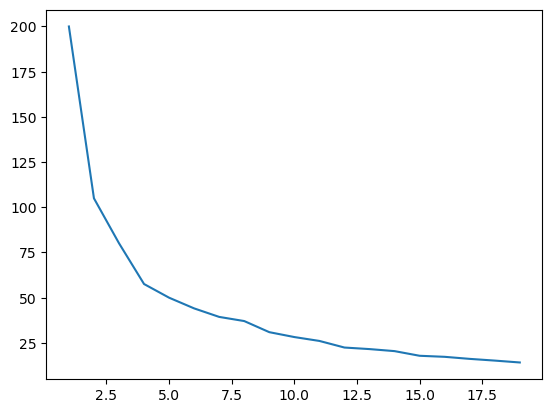

In [34]:
plt.plot(range(1,20),wcss)

In [35]:
km=KMeans(n_clusters=4)
y=km.fit_predict(x)
y

array([1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 3, 0, 2, 3, 2, 3, 1, 3, 0, 2, 0,
       3, 1, 0, 3, 3, 0, 3, 2, 0, 0, 1, 3, 2, 2, 2, 2, 2, 1, 3, 1, 0, 2,
       3, 2, 2, 3, 3, 2])

In [36]:
silhouette_score(x,y)

0.33968891433344395

In [37]:
df['kcluster']=y

In [38]:
df=df.drop(columns='Unnamed: 0')

In [39]:
df.groupby('kcluster').agg('mean')

,Murder,Assault,UrbanPop,Rape,cluster
kcluster,,,,,
0,10.815385,257.384615,76.000000,33.192308,0.923077
1,13.937500,243.625000,53.750000,21.412500,2.625000
2,5.656250,138.875000,73.875000,18.781250,0.000000
3,3.600000,78.538462,52.076923,12.176923,1.846154


In [40]:
df

,Murder,Assault,UrbanPop,Rape,cluster,kcluster
0,13.2,236,58,21.2,3,1
1,10.0,263,48,44.5,1,0
2,8.1,294,80,31.0,1,0
3,8.8,190,50,19.5,0,1
4,9.0,276,91,40.6,1,0
5,7.9,204,78,38.7,1,0
6,3.3,110,77,11.1,0,2
7,5.9,238,72,15.8,0,2
8,15.4,335,80,31.9,1,0
9,17.4,211,60,25.8,3,1


### DBSCAN

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
db = DBSCAN(eps=1,min_samples=5)
ydb = db.fit_predict(x)


In [43]:
silhouette_score(x,ydb)

0.19486631995858555

In [44]:
from sklearn.neighbors import NearestNeighbors

In [45]:
nigh=NearestNeighbors(n_neighbors=8).fit(x)

In [46]:
d,i=nigh.kneighbors(x)
d

array([[0.        , 0.78006247, 0.84928467, 0.92509451, 1.14292205,
        1.29621831, 1.30273924, 1.30290503],
       [0.        , 2.07898369, 2.13697134, 2.30088403, 2.35013877,
        2.35997304, 2.36811895, 2.56180471],
       [0.        , 1.0482199 , 1.08341076, 1.09354181, 1.20621365,
        1.22403776, 1.32378897, 1.37888923],
       [0.        , 1.0013278 , 1.00722663, 1.07057017, 1.24148411,
        1.30290503, 1.436899  , 1.43992053],
       [0.        , 1.20897691, 1.30069114, 1.32378897, 1.53005165,
        1.6957501 , 1.81930503, 1.93115604],
       [0.        , 1.24886253, 1.30069114, 1.32606825, 1.37888923,
        1.41306145, 1.54876384, 1.56244725],
       [0.        , 0.88100359, 0.95643249, 0.99437327, 1.04597225,
        1.08653166, 1.22399673, 1.24051012],
       [0.        , 1.19227586, 1.27140067, 1.42312615, 1.45285466,
        1.56683387, 1.57429436, 1.59692174],
       [0.        , 1.30974334, 1.34926273, 1.45009454, 1.5890679 ,
        1.76715363, 1.770764

In [47]:
dist=np.sort(d[:,1],axis=0)

In [48]:
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

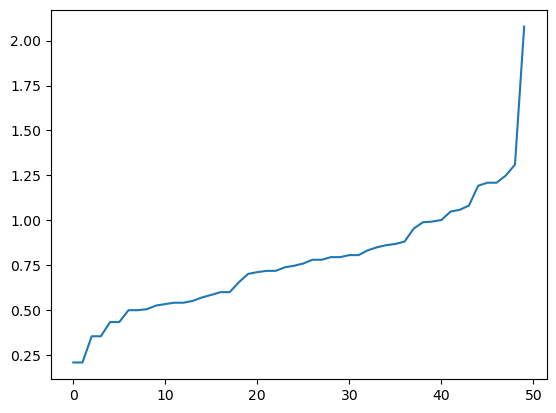

In [49]:
plt.plot(dist)

In [50]:
db=DBSCAN(eps=1.3,min_samples=8)

In [51]:
ypred=db.fit_predict(x)

In [52]:
silhouette_score(x,ypred)

0.3720948164536204

In [53]:
df['DBcluster']=ypred

In [54]:
df[df['DBcluster']==-1]                 #outliers

,Murder,Assault,UrbanPop,Rape,cluster,kcluster,DBcluster
0,13.2,236,58,21.2,3,1,-1
1,10.0,263,48,44.5,1,0,-1
2,8.1,294,80,31.0,1,0,-1
4,9.0,276,91,40.6,1,0,-1
5,7.9,204,78,38.7,1,0,-1
8,15.4,335,80,31.9,1,0,-1
9,17.4,211,60,25.8,3,1,-1
12,10.4,249,83,24.0,1,0,-1
17,15.4,249,66,22.2,3,1,-1
19,11.3,300,67,27.8,1,0,-1


In [55]:
df.drop(columns=['cluster','kcluster'])

,Murder,Assault,UrbanPop,Rape,DBcluster
0,13.2,236,58,21.2,-1
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


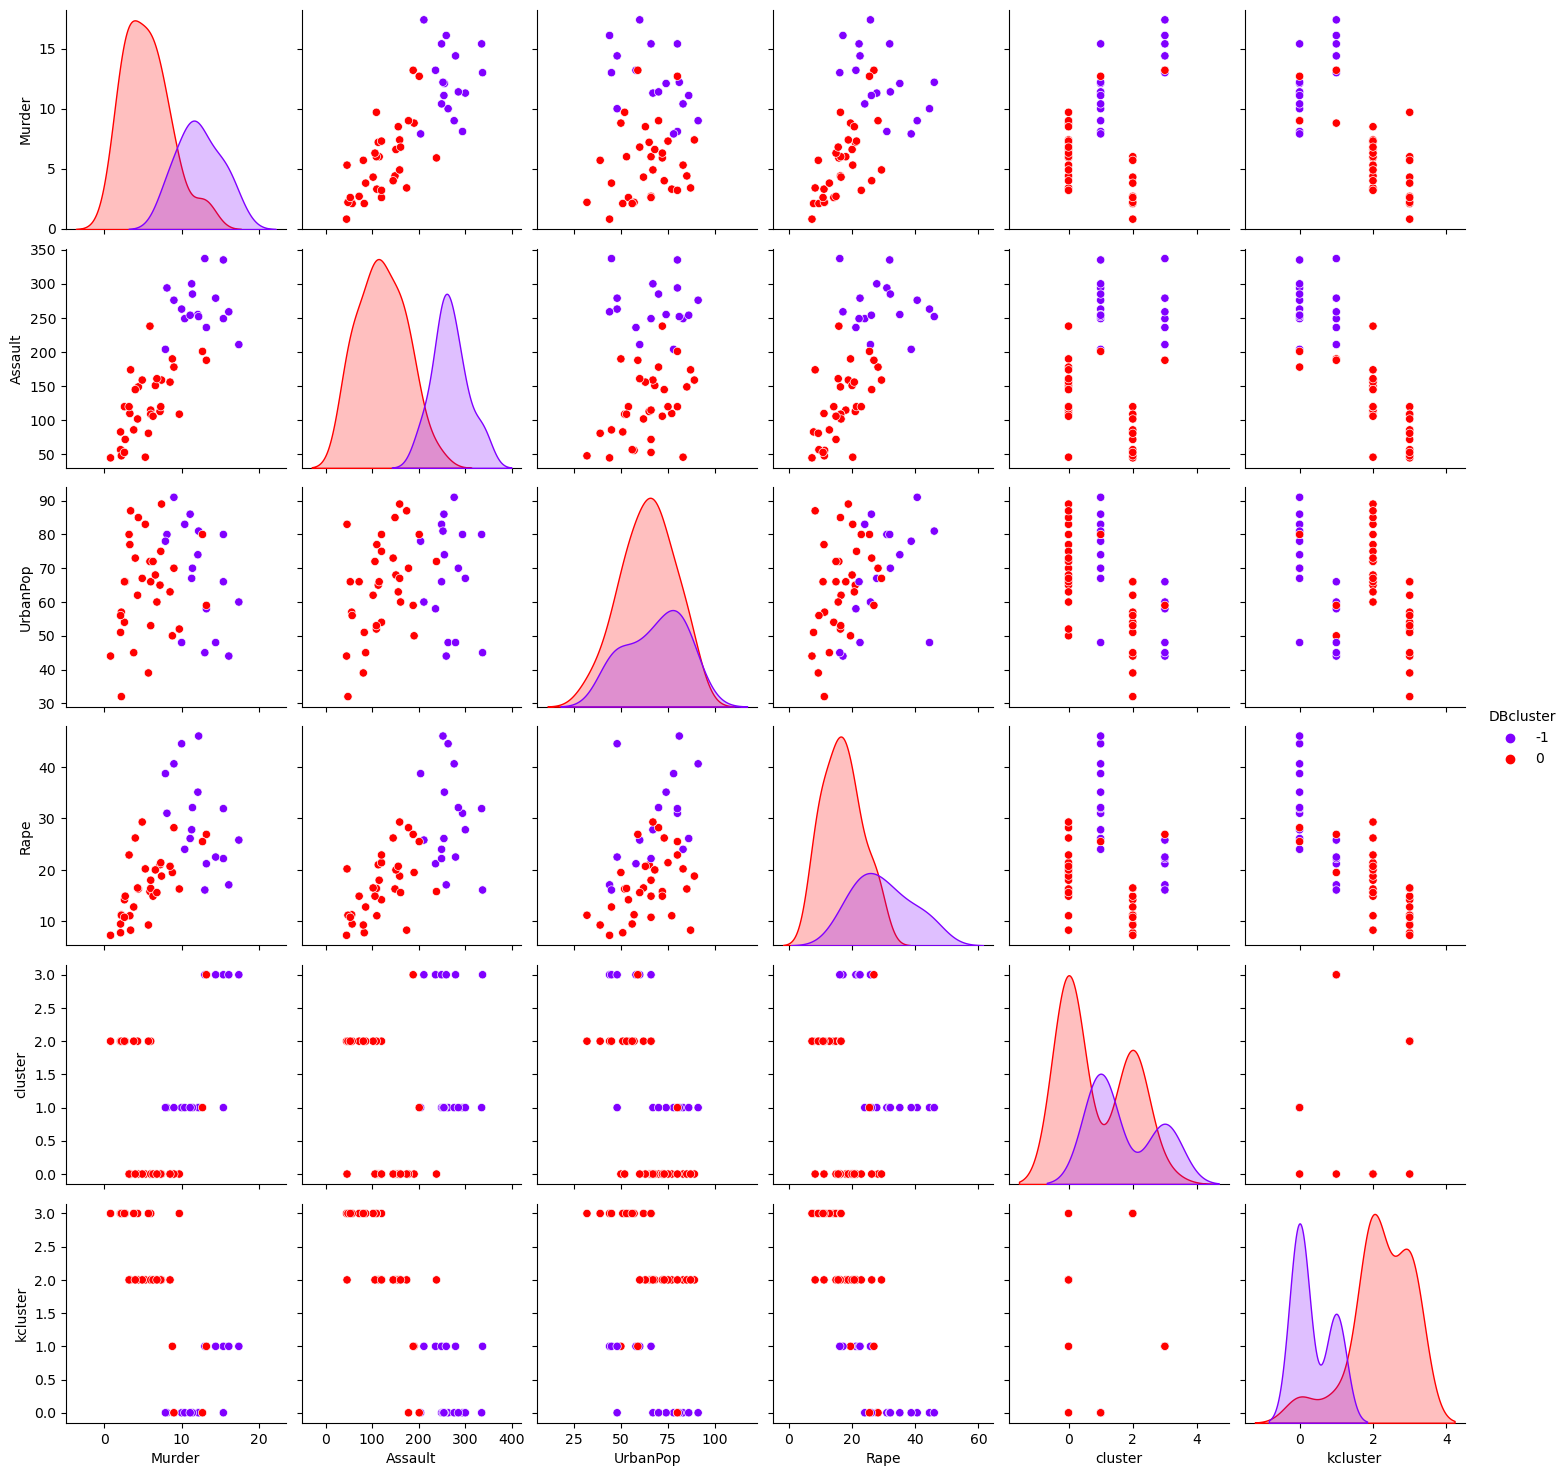

In [56]:
sns.pairplot(df,hue='DBcluster',palette='rainbow')